In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Returns the matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line
def H_heis3():
    # Interactions (I is the identity matrix; X, Y, and Z are Pauli matricies; ^ is a tensor product)
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

In [3]:
# Returns the matrix representation of U_heis3(t) for a given time t assuming an XXX Heisenberg Hamiltonian for 3 spins-1/2 particles in a line
def U_heis3(t):
    # Compute XXX Hamiltonian for 3 spins in a line
    H = H_heis3()
    
    # Return the exponential of -i multipled by time t multipled by the 3 spin XXX Heisenberg Hamilonian 
    return (t * H).exp_i()

In [4]:
import copy

In [5]:
def U_heis3_trotter(t, steps):
        
    XX1 = ((t/steps) * (I^X^X)).exp_i()
    XX2 = ((t/steps) * (X^X^I)).exp_i()
    YY1 = ((t/steps) * (I^Y^Y)).exp_i()
    YY2 = ((t/steps) * (Y^Y^I)).exp_i()
    ZZ1 = ((t/steps) * (I^Z^Z)).exp_i()
    ZZ2 = ((t/steps) * (Z^Z^I)).exp_i()

    u = XX1@YY1@ZZ1@XX2@YY2@ZZ2
    U = copy.copy(u)
    for _ in range(steps-1):
        U = U @ u
    return U

In [6]:
def U_heis3_trotter_2(t, steps):
        
    XX1 = ((t/steps) * (I^X^X)).exp_i()
    XX2 = ((t/steps) * (X^X^I)).exp_i()
    YY1 = ((t/steps) * (I^Y^Y)).exp_i()
    YY2 = ((t/steps) * (Y^Y^I)).exp_i()
    ZZ1 = ((t/steps) * (I^Z^Z)).exp_i()
    ZZ2 = ((t/steps) * (Z^Z^I)).exp_i()

    u = XX1@XX2@YY1@YY2@ZZ1@ZZ2
    U = copy.copy(u)
    for _ in range(steps-1):
        U = U @ u
    return U

In [7]:
ts = np.linspace(0, np.pi, 100)
initial_state = One^One^Zero
probs_110 = [np.abs((~initial_state @ U_heis3(float(t)) @ initial_state).eval())**2 for t in ts]

In [8]:
state = initial_state.to_matrix()
probs_110_trotter = [np.abs(state.conj()@U_heis3_trotter(t, 4).to_matrix()@state)**2 for t in ts]

In [9]:
tmp = []
for steps in [4, 6, 8, 10, 12]:
    tmp.append([np.abs(state.conj()@U_heis3_trotter(t, steps).to_matrix()@state)**2 for t in ts])

In [10]:
tmp2 = []
for steps in [4, 6, 8, 10, 12]:
    tmp2.append([np.abs(state.conj()@U_heis3_trotter_2(t, steps).to_matrix()@state)**2 for t in ts])

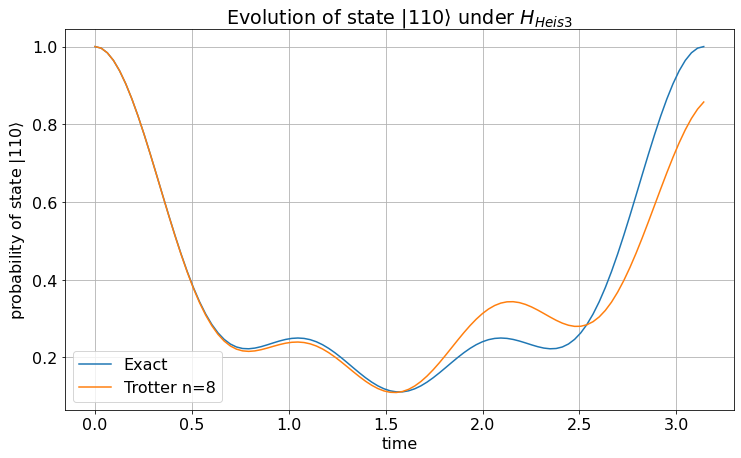

In [11]:
plt.figure(figsize=(12,7))
plt.plot(ts, probs_110, label="Exact")
# plt.plot(ts, probs_110_trotter, label="Trotter n=4")
# plt.plot(ts, tmp[0], label="Trotter n=4")
# plt.plot(ts, tmp[1], label="Trotter n=6")
plt.plot(ts, tmp[2], label="Trotter n=8")
#plt.plot(ts, tmp[3], label="Trotter n=10")
#plt.plot(ts, tmp[4], label="Trotter n=12")

# plt.plot(ts, tmp2[0], label="Trotter 2 n=4")
# plt.plot(ts, tmp2[1], label="Trotter 2 n=6")
# plt.plot(ts, tmp2[2], label="Trotter 2 n=8")
#plt.plot(ts, tmp2[3], label="Trotter 2 n=10")
#plt.plot(ts, tmp2[4], label="Trotter 2 n=12")

plt.xlabel('time')
plt.ylabel(r'probability of state $|110\rangle$')
plt.title(r'Evolution of state $|110\rangle$ under $H_{Heis3}$')
plt.legend()
plt.grid()
plt.show()

# 2 The Open Science Prize
### 2-1 Contest Details
The Open Science Prize requirements and judging criteria can be found in the terms and conditions when registering on the [website](https://ibmquantumawards.bemyapp.com/#/event). Below is an outline of those requirements.

You are to time evolve the state $|110\rangle$ to time $t=\pi$ under the $XXX$ Heisenberg model Hamiltonian $H_{\text{heis3}}$ as defined in Section 1. This will be done on the ibmq_jakarta quantum computer. From left to right, the qubits in $|110\rangle$ correspond to ibmq_jakarta's qubits 5, 3, and 1. The evolution must be done using Trotterization with at least 4 steps ($n\geq4$). You will be judged on the clarity, originiality, and creativity of your solution, as well as the fidelity of the evolved state at time $t=\pi$ using [state tomography](https://qiskit.org/documentation/tutorials/noise/8_tomography.html). State tomography is a way of determining the exact quantum state--even phase information--at the end of a quantum circuit by running the circuit multiple times and measuring in different bases. The closer your final quantum state to the expected state, the higher the fidelity. Ibmq_jakarta's qubits 0, 2, 4, and 6 will not be evaluated by the state tomography calculation, so you may use them as you wish. You do not need to follow the same decomposition given in the example above, but your solution must be a Trotterization of $U_{\text{heis3}}(t)$ with at least 4 steps ($n\geq4$). You may find it useful to implement techniques that reduce errors and improve qubit coherence.

### 2-2 Import Qiskit

Feel free to import packages as needed. However, only free packages and those obtained through ```pip install``` or ```conda install``` are allowed.

In [12]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 2-3 Quantum Devices
Connect to IBM provider and connect to a real or simulated backend. Final submissions must be run on a real backend, but simulated devices are faster for debugging and testing.

In [14]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [15]:
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')


IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q-community, group = ibmquantumawards, project = open-science-22'

In [23]:
# Get backend for experiment
# provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
provider = IBMQ.get_provider('ibm-q')

# jakarta = provider.get_backend('ibmq_jakarta')
jakarta = provider.get_backend('ibmq_manila')

# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
#sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_manila'))


# Noiseless simulated backend
sim = QasmSimulator()

### 2-4 Decomposition of $U_{\text{Heis3}}(t)$ into Quantum Gates (Example)

The following circuit code is written based on the example given in Section 1. This is where you write your solution.

YOUR TROTTERIZATION GOES HERE -- START (beginning of example)

In [24]:
# Parameterize variable t to be evaluated at t=pi later
t = Parameter('t')

In [25]:
# Build a subcircuit for XX(t) two-qubit gate
XX_qr = QuantumRegister(2)
XX_qc = QuantumCircuit(XX_qr, name='XX')

XX_qc.ry(np.pi/2,[0,1])
XX_qc.cnot(0,1)
XX_qc.rz(2 * t, 1)
XX_qc.cnot(0,1)
XX_qc.ry(-np.pi/2,[0,1])

# Convert custom quantum circuit into a gate
XX = XX_qc.to_instruction()

In [26]:
# Build a subcircuit for YY(t) two-qubit gate
YY_qr = QuantumRegister(2)
YY_qc = QuantumCircuit(YY_qr, name='YY')

YY_qc.rx(np.pi/2,[0,1])
YY_qc.cnot(0,1)
YY_qc.rz(2 * t, 1)
YY_qc.cnot(0,1)
YY_qc.rx(-np.pi/2,[0,1])

# Convert custom quantum circuit into a gate
YY = YY_qc.to_instruction()

In [27]:
# Build a subcircuit for ZZ(t) two-qubit gate
ZZ_qr = QuantumRegister(2)
ZZ_qc = QuantumCircuit(ZZ_qr, name='ZZ')

ZZ_qc.cnot(0,1)
ZZ_qc.rz(2 * t, 1)
ZZ_qc.cnot(0,1)

# Convert custom quantum circuit into a gate
ZZ = ZZ_qc.to_instruction()

Combine subcircuits into single gate representing one ($n=1$) trotter step.

In [28]:
# Combine subcircuits into a single multiqubit gate representing a single trotter step
num_qubits = 3

Trot_qr = QuantumRegister(num_qubits)
Trot_qc = QuantumCircuit(Trot_qr, name='Trot')

for i in range(0, num_qubits - 1):
    Trot_qc.append(ZZ, [Trot_qr[i], Trot_qr[i+1]])
    Trot_qc.append(YY, [Trot_qr[i], Trot_qr[i+1]])
    Trot_qc.append(XX, [Trot_qr[i], Trot_qr[i+1]])

# Convert custom quantum circuit into a gate
Trot_gate = Trot_qc.to_instruction()

In [29]:
Trot_qc.depth()

6

YOUR TROTTERIZATION GOES HERE -- FINISH (end of example)

In [30]:
trotter_qr = QuantumRegister(2)
trotter_qc = QuantumCircuit(trotter_qr, name='trotter')

trotter_qc.cnot(0, 1)
trotter_qc.rx(2 * t - np.pi/2, 0)
trotter_qc.rz(2 * t, 1)
trotter_qc.h(0)
trotter_qc.cnot(0, 1)
trotter_qc.h(0)
trotter_qc.rz(- 2 * t, 1)
trotter_qc.cnot(0, 1)
trotter_qc.rx(np.pi/2, 0)
trotter_qc.rx(-np.pi/2, 1)

trotter = trotter_qc.to_instruction()


In [31]:
trotter_qc.draw()

┌───────────────────────────┐┌───┐        ┌───┐         ┌─────────┐ 
q5_0: ──■──┤ RX(2*t - 1.5707963267949) ├┤ H ├──■─────┤ H ├──────■──┤ RX(π/2) ├─
      ┌─┴─┐└────────┬─────────┬────────┘└───┘┌─┴─┐┌──┴───┴───┐┌─┴─┐├─────────┴┐
q5_1: ┤ X ├─────────┤ RZ(2*t) ├──────────────┤ X ├┤ RZ(-2*t) ├┤ X ├┤ RX(-π/2) ├
      └───┘         └─────────┘              └───┘└──────────┘└───┘└──────────┘

In [32]:
# Combine subcircuits into a single multiqubit gate representing a single trotter step
num_qubits = 3

Trot_qr = QuantumRegister(num_qubits)
Trot_qc = QuantumCircuit(Trot_qr, name='Trot')

for i in range(0, num_qubits - 1):
    Trot_qc.append(trotter, [Trot_qr[i], Trot_qr[i+1]])

# Convert custom quantum circuit into a gate
Trot_gate = Trot_qc.to_instruction()

In [33]:
Trot_qc.decompose().draw()

┌───────────────────────────┐┌───┐        ┌───┐         ┌─────────┐ »
q6_0: ──■──┤ RX(2*t - 1.5707963267949) ├┤ H ├──■─────┤ H ├──────■──┤ RX(π/2) ├─»
      ┌─┴─┐└────────┬─────────┬────────┘└───┘┌─┴─┐┌──┴───┴───┐┌─┴─┐├─────────┴┐»
q6_1: ┤ X ├─────────┤ RZ(2*t) ├──────────────┤ X ├┤ RZ(-2*t) ├┤ X ├┤ RX(-π/2) ├»
      └───┘         └─────────┘              └───┘└──────────┘└───┘└──────────┘»
q6_2: ─────────────────────────────────────────────────────────────────────────»
                                                                               »
«                                                                   »
«q6_0: ─────────────────────────────────────────────────────────────»
«           ┌───────────────────────────┐┌───┐        ┌───┐         »
«q6_1: ──■──┤ RX(2*t - 1.5707963267949) ├┤ H ├──■─────┤ H ├──────■──»
«      ┌─┴─┐└────────┬─────────┬────────┘└───┘┌─┴─┐┌──┴───┴───┐┌─┴─┐»
«q6_2: ┤ X ├─────────┤ RZ(2*t) ├──────────────┤ X ├┤ RZ(-2*t) ├┤ X ├»
«      └───┘         └─────────┘              └───┘└──────────┘└───┘»
«                  
«q6_0: ────────────
«      ┌─────────┐ 
«q6_1: ┤ RX(π/2) ├─
«      ├─────────┴┐
«q6_2: ┤ RX(-π/2) ├
«      └──────────┘

### 2-5 Trotterized Time Evolution

Time evolve the state $|110\rangle$ from $\theta=0$ to $\theta=\pi$ under $H_{\text{heis3}}$. Although jakarta has 7 qubits, only the qubits 1, 3, and 5 will be used for the state $|110\rangle$. From left to right, the qubits in $|110\rangle$ corresponds to the qubits 5, 3, and 1 on jakarta. State tomography will evaluate how well the quantum simulation matches to the expected state at $\theta= \pi$. (Note qubits 0, 2, 4, and 6 are not part of the state tomography calculation.)

You choose how many trotter steps (```trotter_steps```) to take in the simulation, but it must be at least 4. The code below is written to be generic enough for you may add to it if necessary for your solution.

In [34]:
# The final time of the state evolution
target_time = np.pi

# Number of trotter steps
trotter_steps = 8  ### CAN BE >= 4

# Initialize quantum circuit for 3 qubits
qr = QuantumRegister(7)
qc = QuantumCircuit(qr)

# Prepare initial state (remember we are only evolving 3 of the 7 qubits on jakarta qubits (q_5, q_3, q_1) corresponding to the state |110>)
qc.x([3,5])  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)

# Simulate time evolution under H_heis3 Hamiltonian
for _ in range(trotter_steps):
    qc.append(Trot_gate, [qr[1], qr[3], qr[5]])

# Evaluate simulation at target_time (t=pi) meaning each trotter step evolves pi/trotter_steps in time
qc = qc.bind_parameters({t: target_time/trotter_steps})

# Generate state tomography circuits to evaluate fidelity of simulation
st_qcs = state_tomography_circuits(qc, [qr[1], qr[3], qr[5]])

# Display circuit for confirmation
# st_qcs[-1].decompose().draw()  # view decomposition of trotter gates
st_qcs[-1].draw()  # only view trotter gates

»
q7_0: ─────────────────────────────────────────────────────────────»
           ┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
q7_1: ─────┤0           ├┤0           ├┤0           ├┤0           ├»
           │            ││            ││            ││            │»
q7_2: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q7_3: ┤ X ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├»
      └───┘│            ││            ││            ││            │»
q7_4: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q7_5: ┤ X ├┤2           ├┤2           ├┤2           ├┤2           ├»
      └───┘└────────────┘└────────────┘└────────────┘└────────────┘»
q7_6: ─────────────────────────────────────────────────────────────»
                                                                   »
c0: 3/═════════════════════════════════════════════════════════════»
                                                                   »
«                                                               ░          
«q7_0: ─────────────────────────────────────────────────────────░──────────
«      ┌────────────┐┌────────────┐┌────────────┐┌────────────┐ ░ ┌─┐      
«q7_1: ┤0           ├┤0           ├┤0           ├┤0           ├─░─┤M├──────
«      │            ││            ││            ││            │ ░ └╥┘      
«q7_2: ┤            ├┤            ├┤            ├┤            ├─░──╫───────
«      │            ││            ││            ││            │ ░  ║ ┌─┐   
«q7_3: ┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├─░──╫─┤M├───
«      │            ││            ││            ││            │ ░  ║ └╥┘   
«q7_4: ┤            ├┤            ├┤            ├┤            ├─░──╫──╫────
«      │            ││            ││            ││            │ ░  ║  ║ ┌─┐
«q7_5: ┤2           ├┤2           ├┤2           ├┤2           ├─░──╫──╫─┤M├
«      └────────────┘└────────────┘└────────────┘└────────────┘ ░  ║  ║ └╥┘
«q7_6: ─────────────────────────────────────────────────────────░──╫──╫──╫─
«                                                               ░  ║  ║  ║ 
«c0: 3/════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                  0  1  2

In [35]:
st_qcs

### 2-6 Execute
For your final submission, you will need to execute your solution on a real backend with 8 repetitions. For faster debugging, considering using a simulated backend and/or 1 repetition.

In [36]:
from qiskit import Aer

In [38]:
shots = 8192
reps = 1
backend = sim_noisy_jakarta
#backend = Aer.get_backend('aer_simulator_statevector')
# reps = 8
# backend = jakarta#

jobs = []
for _ in range(reps):
    # execute
    job = execute(st_qcs, backend, shots=shots)
    print('Job ID', job.job_id())
    jobs.append(job)

TranspilerError: "Number of qubits (7) in ('X', 'X', 'X') is greater than maximum (5) in the coupling_map"

We can monitor the status of the jobs using Qiskit's job monitoring tools.

In [15]:
for job in jobs:
    job_monitor(job)
    try:
        if job.error_message() is not None:
            print(job.error_message())
    except:
        pass

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


### 2-7 Results Analysis
Extract the results for the completed jobs and compute the state tomography fidelity for each repetition. You may choose to include other post-processing analyses here as well.

In [195]:
# Compute the state tomography based on the st_qcs quantum circuits and the results from those ciricuits
def state_tomo(result, st_qcs):
    # The expected final state; necessary to determine state tomography fidelity
    target_state = (One^One^Zero).to_matrix()  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)
    # Fit state tomography results
    tomo_fitter = StateTomographyFitter(result, st_qcs)
    rho_fit = tomo_fitter.fit(method='lstsq')
    # Compute fidelity
    fid = state_fidelity(rho_fit, target_state)
    return fid

# Compute tomography fidelities for each repetition
fids = []
for job in jobs:
    fid = state_tomo(job.result(), st_qcs)
    fids.append(fid)
    
print('state tomography fidelity = {:.4f} \u00B1 {:.4f}'.format(np.mean(fids), np.std(fids)))

state tomography fidelity = 0.8545 ± 0.0000
